In [84]:
import numpy as np
import pandas as pd
from pathlib import Path

saveyn= True
n_samples=  1000
f_df = Path('../data/PriorModel/Dist_table.xlsx')
output_dir = f_df.parent

df = pd.read_excel(f_df).loc[:,['Parameter Name','Distribution']]

In [85]:
def load_obj(dirname,name):
    import pickle
    with open(Path(dirname).joinpath(name + '.pkl').as_posix(), 'rb') as f:
        return pickle.load(f)

def save_obj(dirname,obj,name):
    import pickle
    with open(Path(dirname).joinpath(name + '.pkl').as_posix(), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def interp_dist(dist,n_samples):
    lu_str = dist.split(sep='[')[-1].split(sep=']')[0].split(sep=',')
    lower,upper = (float(lu_str[0]),float(lu_str[1]))    
    if dist.startswith("U"):
        vals =  lower + np.random.rand(n_samples)*(upper-lower)
    elif dist.startswith("LU"):
        lower = np.log(lower)
        upper = np.log(upper)
        vals =  np.exp(lower + np.random.rand(n_samples)*(upper-lower))
    elif dist.startswith("P"):
        vals = np.random.randint(0,len(lu_str),n_samples)
    return vals

In [86]:
varlist = {}
np.see
for nam,dist in df.loc[:,['Parameter Name','Distribution']].values:
    varlist[nam] = interp_dist(dist = dist,n_samples=n_samples)
if saveyn:
    save_obj(output_dir,varlist,'varlist')

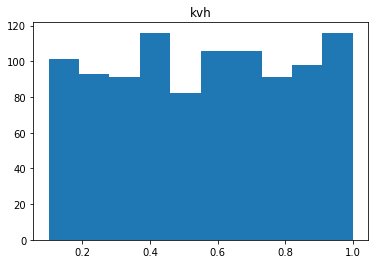

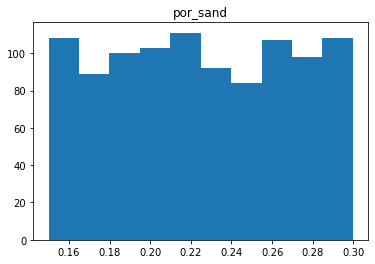

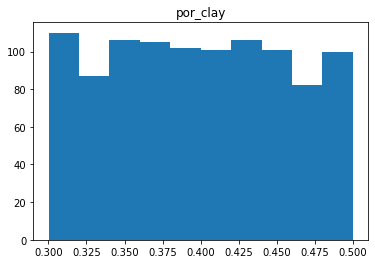

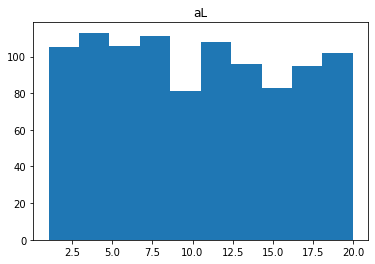

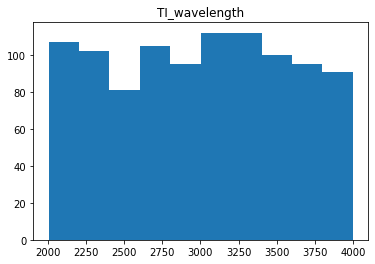

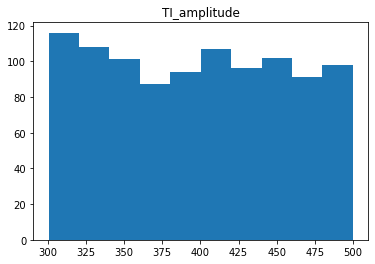

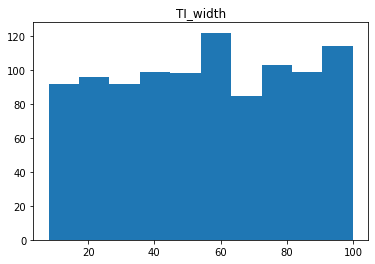

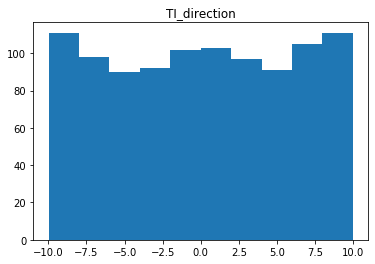

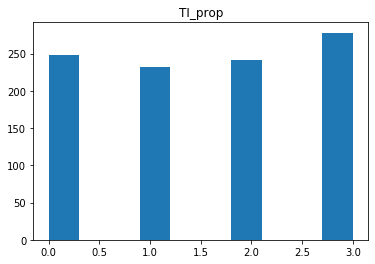

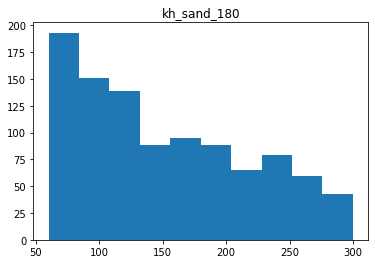

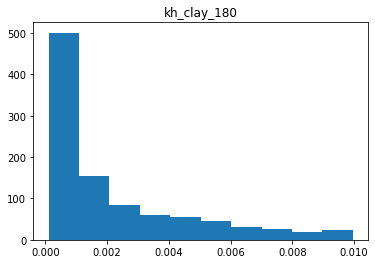

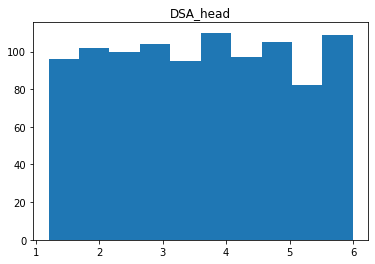

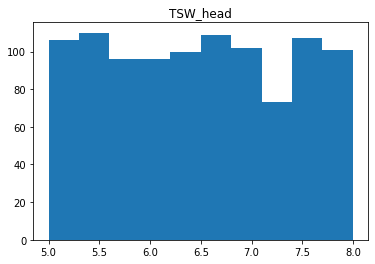

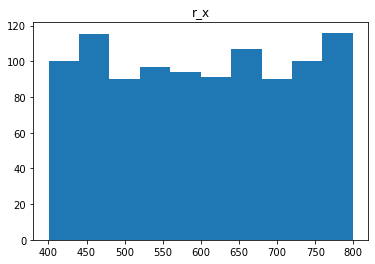

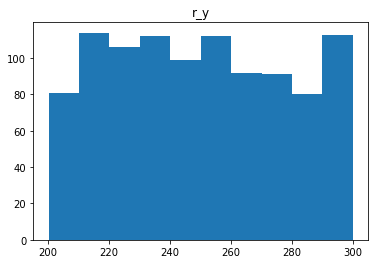

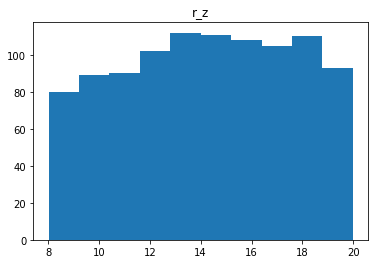

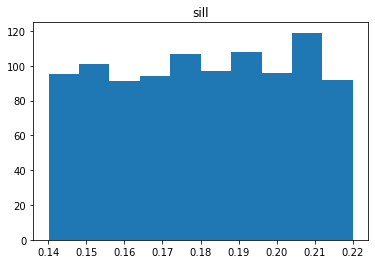

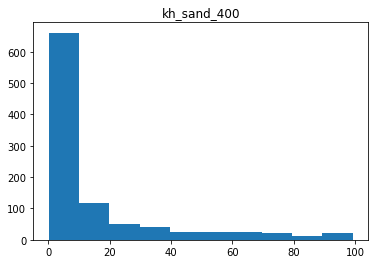

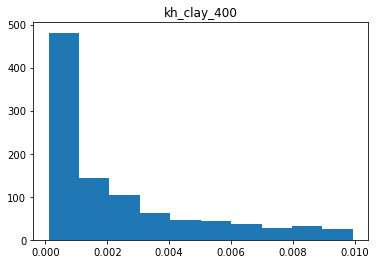

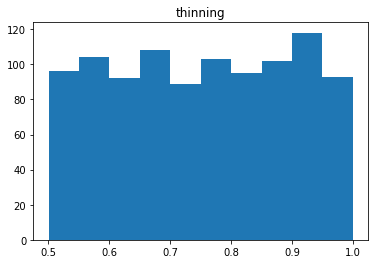

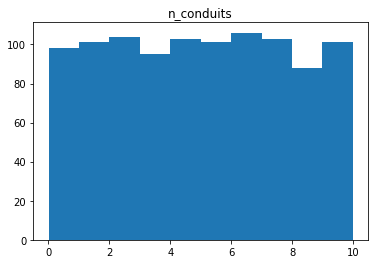

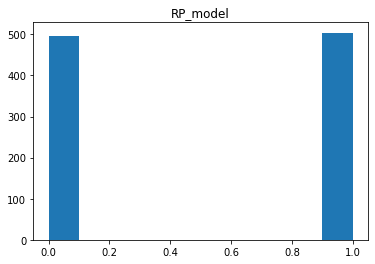

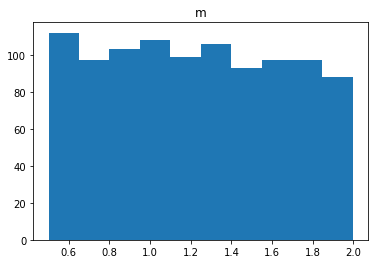

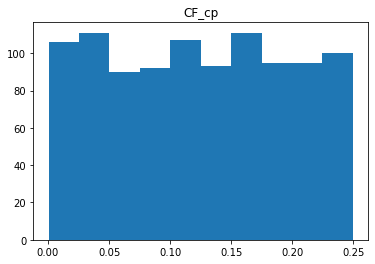

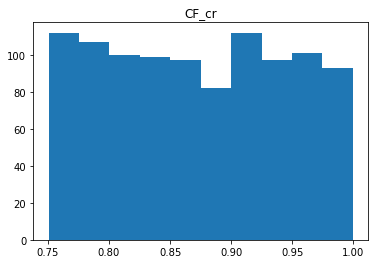

In [81]:
for k,v in varlist.items():
    plt.figure()
    plt.title(k)
    plt.hist(v)
    plt.show()